<a href="https://colab.research.google.com/github/yaedam5/Image-classifier./blob/master/Ball_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0 모듈 불러오기**

https://github.com/yaedam5/Image-Crawling


In [ ]:
!pip install gdown

In [ ]:
import os
import zipfile

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator # 이미지 처리용 라이브러리

In [ ]:
# 파일을 다운 받는다.
#https://drive.google.com/file/d/1ZreGn83uprB_7f5BDV_fcDwSGLe8BWVN/view?usp=sharing
!gdown https://drive.google.com/uc?id=1ZreGn83uprB_7f5BDV_fcDwSGLe8BWVN

Downloading...
From: https://drive.google.com/uc?id=1ZreGn83uprB_7f5BDV_fcDwSGLe8BWVN
To: /content/Ball.zip
100% 100M/100M [00:01<00:00, 90.1MB/s] 


In [ ]:
local_zip = 'Ball.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r') 
# ZipFile의 첫 번째 매개변수는 파일 자체의 경로. 두 번째 매개변수는 읽기 모드로 파일을 연다.
zip_ref.extractall('')
zip_ref.close()

**2 데이터 전처리**

ImageDataGenerator:데이터 부풀리기

shear_range : Float, Shear Intensity ( share angle in counter-clockwise direction as radians) 밀린강도 범위내에서 임의로 원본 이미지를 변형 시킵니다. 수치는 시계반대방향으로 밀림강도를 radian으로 나타냅니다.

zoom_range : Float or [lower, upper]. Range for random zoom. if a float, 지정된 확대/축소 범위내에 임의로 원본이미지를 확대/ 축소 합니다. (1 - 수치) ~ (1+ 수치) 사이의 범위로 확대 축소를 합니다. ex> zoom_range = 0.3

horizontal_flip : Boolean, Randomly flip inputs horizontally. 수평방향 뒤집기(true)

vertical_flip : 수직 방향 뒤집기(true)

rescale : rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multipy the data by the value provided (before applying any other transformation)

rotaion_range : 지정된 각도 범위내에서 임의로 원본 이미지를 회전 시킵니다. 단위 도, 정수형 ex>rotaion_range=90

width_shift_range : 지정된 수평방향 이동 범위 내에서 임의로 원본 이미지를 이동 시킵니다. 수치는 전체 넓이의 비율(실수)로 나타냅니다. ex> 0.1이면 전체 넓이 100의 10px 좌우로 이동

hight_shift_range: 지정된 수직방향 이동 범위 내에서 임의로 원본 이미지를 이동 시킵니다. 수치는 전체 넓이의 비율(실수)로 나타냅니다

In [ ]:
# train:test = 8:2, 총 데이터셋: 600개
# ImageDataGenerator parameter 를 이용하면 따로 라벨을 정해주지않고 폴더에 라벨링 해준데로 라벨링이 됩니다.

validation_ratio = 1/8  # validation_split 파라미터로 train set과 validation set을 나눌 수 있습니다.

TRAINING_DIR = "ball_train" 
datagen = ImageDataGenerator(validation_split=validation_ratio,
                             rescale = 1./255, # 0~1 사이값으로 픽셀값을 변환
                             rotation_range=20,  #너무 크게 바꾸지 않고 20도 범위내에서만 회전 변환
                             width_shift_range=0.1,  # 10% 범위에서 좌우 이동
                             height_shift_range=0.1, # 10% 범위에서 상하 이동
                             shear_range=0.7,        # 70% 범위에서 기울임
                             zoom_range=[0.8, 2.0],  # 20%~120%범위에서 확대 축소
                             horizontal_flip=True,   # 수평뒤집기
                             vertical_flip=True,     # 수직뒤집기
                            fill_mode='nearest')   # 변형하면서 이미지가 깨지는 것을 보상,주변에 있는 범위 참고
# 사진은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높다 (통상적인 learning rate를 사용할 경우). 
# 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜준다. 이는 다른 전처리 과정에 앞서 가장 먼저 적용된다.  / 출처: https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/

train_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  # 모든 이미지의 크기가 256x256로 조정된다.
    class_mode='categorical', # 다중 클래스 문제는 class_mode는 ‘categorical’로 지정한다.
    batch_size=24, # 몇 개의 샘플로 가중치를 갱신할 것인지 지정한다. 한 번에 전처리할 이미지의 수
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  # 모든 이미지의 크기가 256x256로 조정된다.
    class_mode='categorical', # 다중 클래스 문제는 class_mode는 ‘categorical’로 지정한다.
    batch_size=24, # 몇 개의 샘플로 가중치를 갱신할 것인지 지정한다.
    subset='validation'
)
# 라벨링 categorical 다중라벨링
# 라벨링 방법 : 폴더명의 첫 문자의 알파벳으로 0부터 부여


TEST_DIR = "ball_test"
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=8
)

Found 516 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


In [ ]:
#폴더명의 첫 문자의 알파벳으로 0부터 부여
print(train_generator.class_indices)
print(test_generator.class_indices)

{'Soccer ball': 0, 'baseball': 1, 'basketball': 2}
{'Soccer ball': 0, 'baseball': 1, 'basketball': 2}


**3 모델 구축**

In [ ]:
model = tf.keras.models.Sequential([ 
    # 64개의 필터 적용,  kernel_size = (3,3) 는 필터의 크기를 의미한다.
    # input_shape(가로, 세로, 흑백(=1)or컬러(=3))
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flattn은 3차원 배열(가로,세로,컬러)인 이미지를 1차원 배열로 바꿔준다.
    tf.keras.layers.Flatten(),
    # Dropout()는 특정 노드에 학습이 지나치게 몰리는 것을 방지하기 위해 랜덤하게 일부 노드를 꺼준다.
    # Dropout을 통해 과적합을 조금 더 효과적으로 회피할 수 있다. /  출처: https://snowdeer.github.io/machine-learning/2018/01/10/convolution-neural-network/
    tf.keras.layers.Dropout(0.5),
    # 출력뉴런 수 512개
    tf.keras.layers.Dense(512, activation='relu'),
    # 출력뉴런 수 3개(라벨 개수)
    tf.keras.layers.Dense(3, activation='softmax') #softmax함수: 다중 클래스 분류 문제에서 출력층에 주로 쓰인다.
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, steps_per_epoch=15, verbose = 1, validation_data = validation_generator, validation_steps=3)
# epochs : 학습 반복 횟수, (batch_size)*(step_per_epoch)=(Training_data)
# steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정한다.steps_per_epoch = 훈련 샘플 수 / 배치 사이즈
# validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정한다.
# verbose : verbose : 학습 중 출력되는 문구를 설정한다.
# 0 : 아무 것도 출력하지 않는다.
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
# 2 : 미니 배치마다 손실 정보를 출력한다.   /   출처: https://wikidocs.net/32105

Epoch 1/30
 8/15 [===============>..............] - ETA: 33s - loss: 2.9618 - accuracy: 0.3778

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/15 [=========================>....] - ETA: 9s - loss: 2.2161 - accuracy: 0.3733 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 24 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but on

15/15 [==============================] - 82s 5s/step - loss: 2.0566 - accuracy: 0.3851 - val_loss: 0.9891 - val_accuracy: 0.4028
Epoch 2/30
15/15 [==============================] - 79s 5s/step - loss: 1.0862 - accuracy: 0.4195 - val_loss: 4.2172 - val_accuracy: 0.4028
Epoch 3/30
15/15 [==============================] - 79s 5s/step - loss: 1.3314 - accuracy: 0.5029 - val_loss: 0.8352 - val_accuracy: 0.7083
Epoch 4/30
15/15 [==============================] - 78s 5s/step - loss: 0.8912 - accuracy: 0.6149 - val_loss: 0.8736 - val_accuracy: 0.5417
Epoch 5/30
15/15 [==============================] - 80s 5s/step - loss: 0.9020 - accuracy: 0.6250 - val_loss: 0.6238 - val_accuracy: 0.7778
Epoch 6/30
15/15 [==============================] - 82s 5s/step - loss: 0.7896 - accuracy: 0.6639 - val_loss: 0.6964 - val_accuracy: 0.6806
Epoch 7/30
15/15 [==============================] - 78s 5s/step - loss: 0.8537 - accuracy: 0.6810 - val_loss: 0.7393 - val_accuracy: 0.7083
Epoch 8/30
15/15 [=============

**4 모델 시각화**

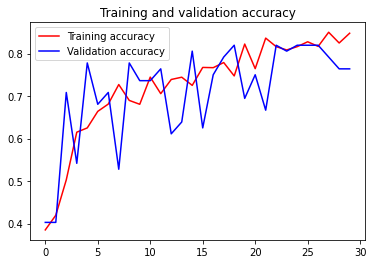

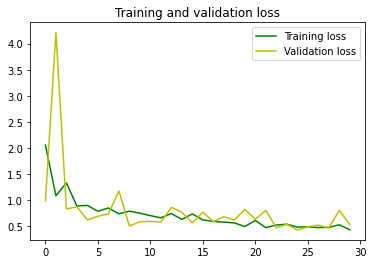

In [ ]:
import matplotlib.pyplot as plt # 결과를 시각화 하기위한 라이브러리
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend(loc='best')
plt.title('Training and validation accuracy') 


plt.figure(2)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend(loc='best')
plt.title('Training and validation loss') 



plt.show()

**5모델 성능 평가**

In [ ]:
# 훈련된 모델을 test_generator로 평가한다.
print("-- Evaluate(정확도) --") 
scores = model.evaluate_generator(test_generator, steps=5) 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate(정확도) --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 70.00%


**6 이미지 예측**

Saving 야구공2.jfif to 야구공2 (1).jfif


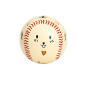

New Image :  baseball


In [ ]:
# 훈련된 모델에 이미지를 입력하여 직접 결과를 볼 수 있다.

import numpy as np
from google.colab import files
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2

categories = ['Soccer ball', 'baseball', 'basketball']
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  image_1 = cv2.imread(fn, cv2.IMREAD_REDUCED_COLOR_4)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model.predict(images, batch_size=10)
  
  cv2_imshow(image_1)
  result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
  print('New Image : ',categories[result[0]])